# K Means Clustering (RGB)

Count of Labels =  [(1, 94478), (3, 54171), (0, 53673), (2, 36458), (4, 23364)]


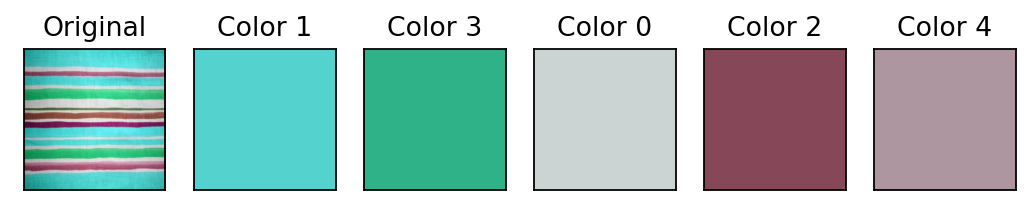

Count of Labels =  [(0, 88658), (3, 76722), (1, 63614), (4, 42574), (2, 35632)]


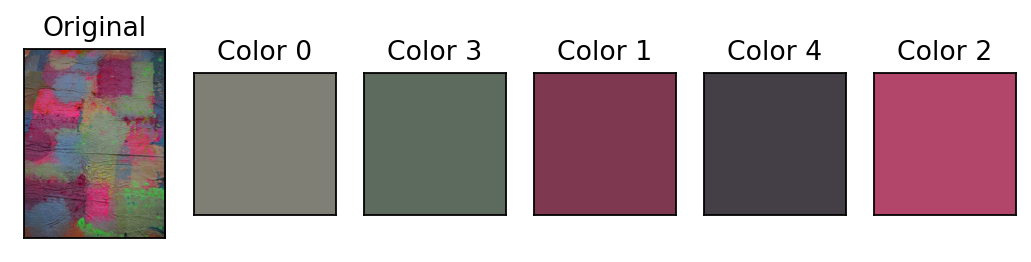

Count of Labels =  [(2, 32558), (1, 31309), (0, 26934), (3, 14872), (4, 14327)]


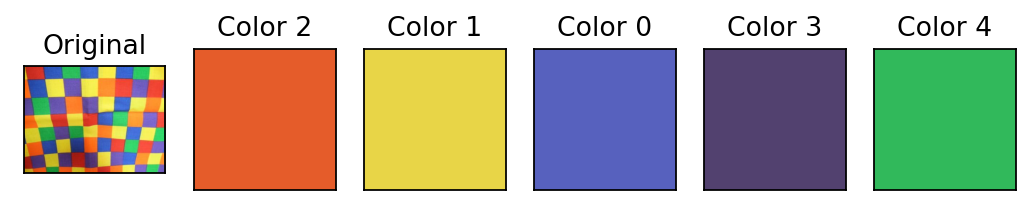

Count of Labels =  [(1, 155018), (4, 102657), (0, 94677), (3, 39625), (2, 17623)]


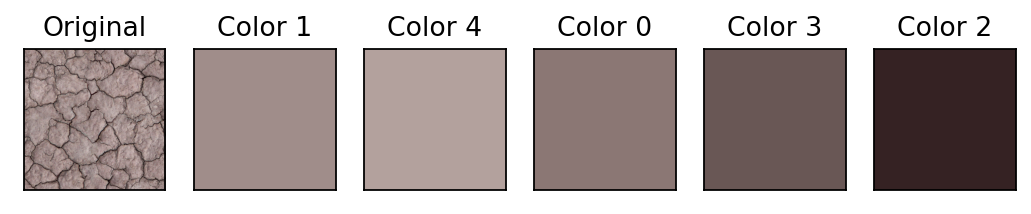

Count of Labels =  [(2, 63750), (1, 55436), (0, 50934), (4, 35204), (3, 21176)]


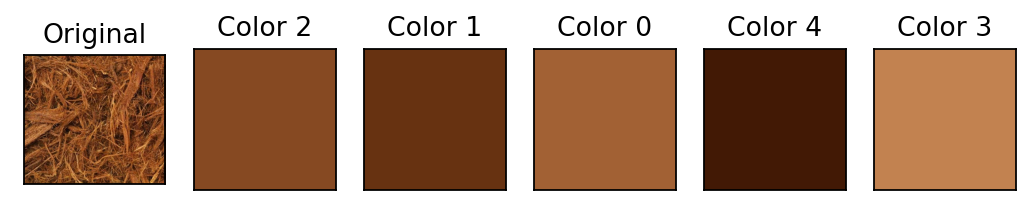

Count of Labels =  [(0, 73880), (3, 72152), (2, 38956), (4, 19143), (1, 16972)]


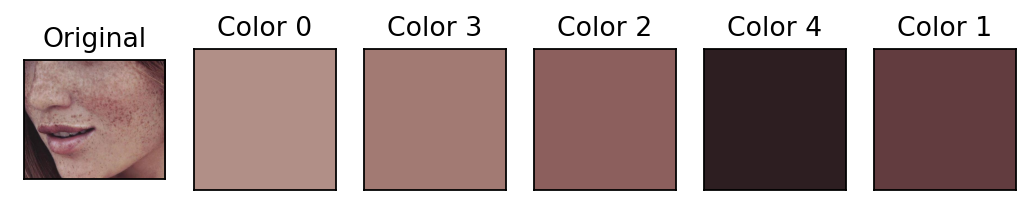

Count of Labels =  [(1, 54006), (4, 53254), (0, 50070), (2, 33564), (3, 28916)]


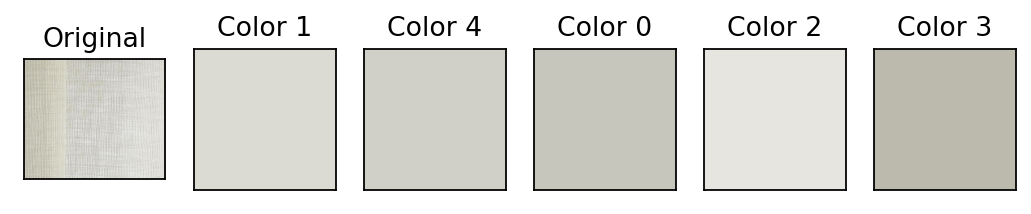

Count of Labels =  [(2, 54066), (0, 17491), (1, 13113), (4, 8398), (3, 3028)]


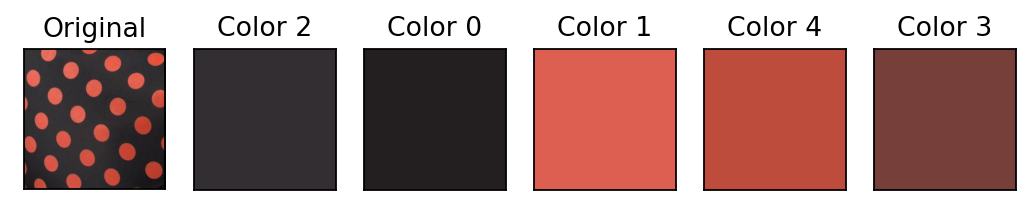

Count of Labels =  [(4, 105240), (0, 69691), (1, 46909), (3, 26091), (2, 23005)]


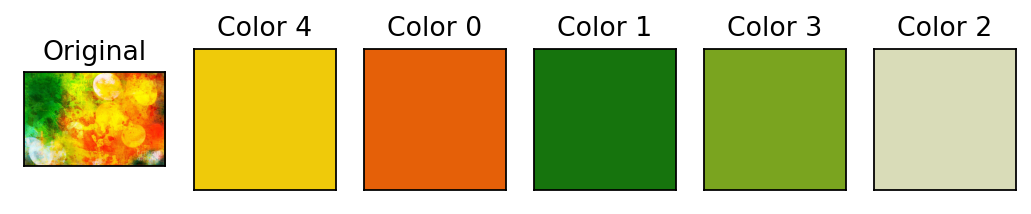

Count of Labels =  [(4, 53430), (1, 46673), (3, 31173), (2, 24207), (0, 19241)]


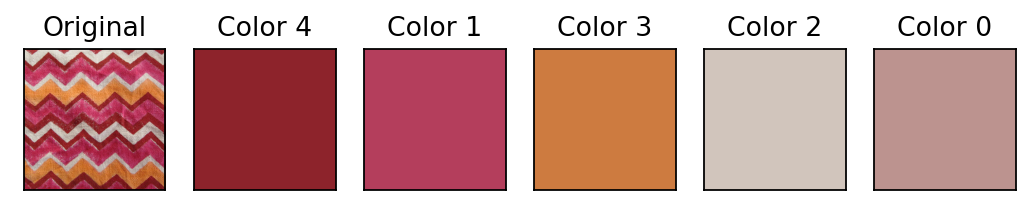

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
import os
from sklearn.cluster import KMeans

folder = 'sample'
for filename in os.listdir(folder):
    figure(figsize=(8, 6), dpi=160)
    img_original = cv.imread(folder+'/'+filename)
    img_original= cv.cvtColor(img_original, cv.COLOR_BGR2RGB)
    pixels = np.reshape(img_original,(-1,3))
    clustering = KMeans(init="k-means++",n_clusters=5).fit(pixels)
    labels_unique = np.unique(clustering.labels_)
    counter = Counter(clustering.labels_)
    print('Count of Labels = ',counter.most_common())
    plt.subplot(1,len(clustering.cluster_centers_)+1,1),plt.imshow(img_original)
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    for i in range(len(counter.most_common())):
        color_i = [[clustering.cluster_centers_[counter.most_common()[i][0]]/255]*400]*400
        plt.subplot(1,len(clustering.cluster_centers_)+1,i+2),plt.imshow(color_i)
        plt.title('Color '+str(counter.most_common()[i][0])), plt.xticks([]), plt.yticks([])
    plt.show()

# K Means Clustering (HSV)

Count of Labels =  [(1, 146065), (2, 52592), (3, 28781), (0, 19822), (4, 14884)]


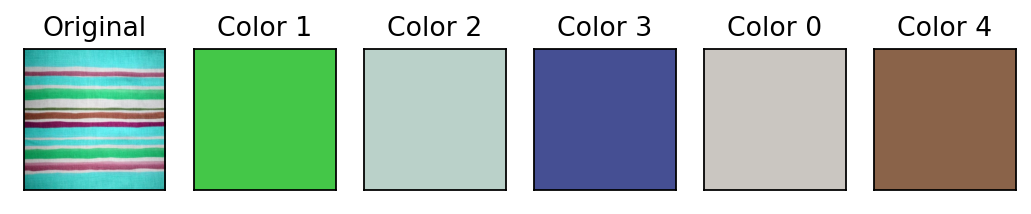

Count of Labels =  [(1, 92444), (2, 83731), (0, 64268), (3, 37125), (4, 29632)]


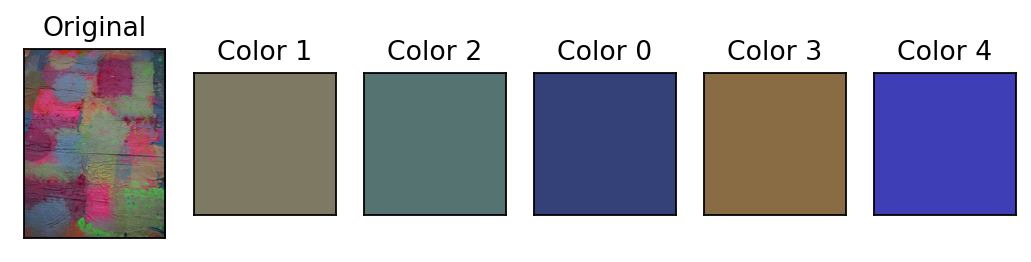

Count of Labels =  [(4, 40367), (2, 27316), (1, 22995), (3, 15643), (0, 13679)]


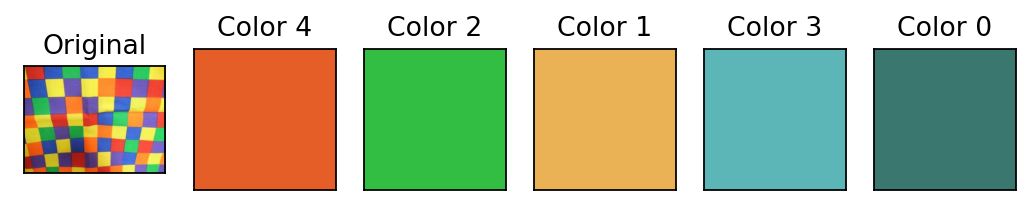

Count of Labels =  [(0, 248246), (3, 82630), (1, 62196), (2, 12706), (4, 3822)]


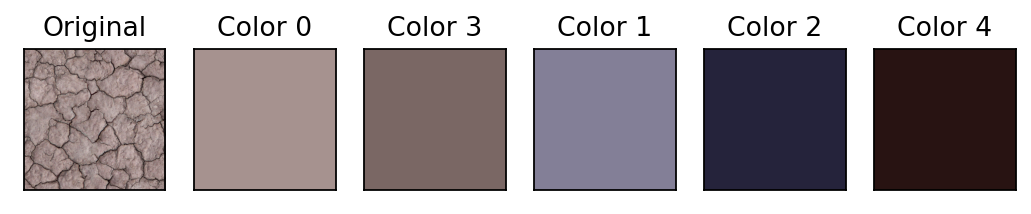

Count of Labels =  [(3, 67679), (2, 48325), (4, 40844), (0, 37732), (1, 31920)]


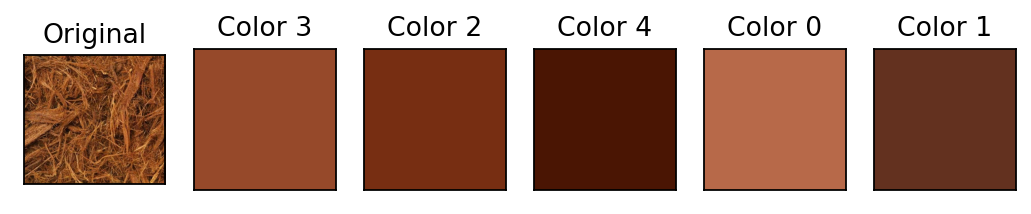

Count of Labels =  [(1, 126777), (3, 46313), (2, 16705), (0, 15875), (4, 15433)]


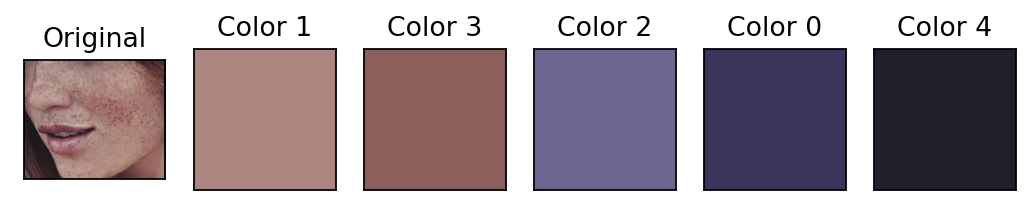

Count of Labels =  [(2, 60584), (0, 54995), (4, 39066), (3, 34912), (1, 30253)]


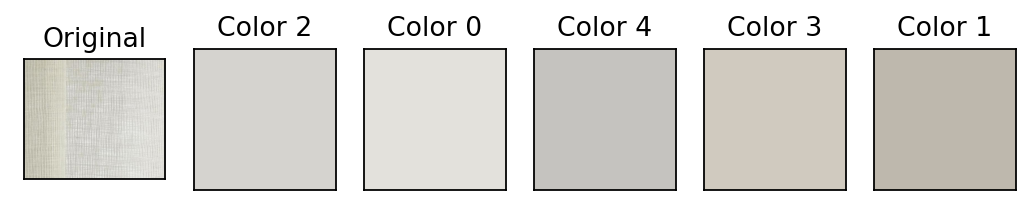

Count of Labels =  [(0, 51345), (1, 21183), (3, 8717), (4, 8272), (2, 6579)]


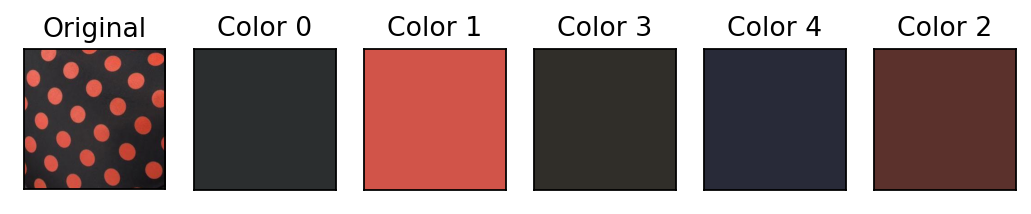

Count of Labels =  [(0, 147191), (3, 45066), (1, 44893), (2, 18241), (4, 15545)]


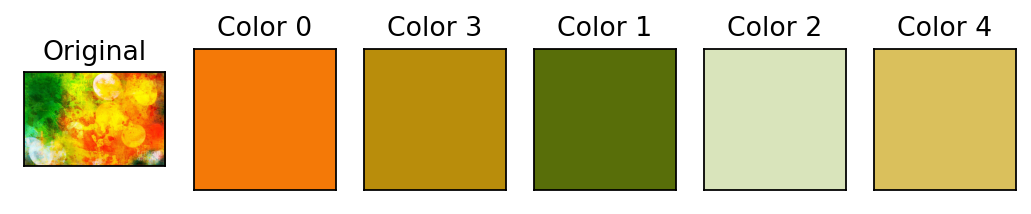

Count of Labels =  [(1, 59703), (0, 36065), (2, 31250), (3, 29137), (4, 18569)]


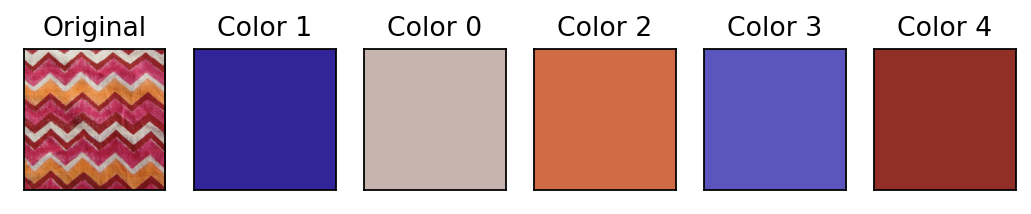

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
import os
from sklearn.cluster import KMeans
from matplotlib.colors import hsv_to_rgb

folder = 'sample'
for filename in os.listdir(folder):
    figure(figsize=(8, 6), dpi=160)
    img_original = cv.imread(folder+'/'+filename)
    img_rgb= cv.cvtColor(img_original, cv.COLOR_BGR2RGB)
    img_hsv = cv.cvtColor(img_original, cv.COLOR_BGR2HSV)
    pixels = np.reshape(img_hsv,(-1,3))
    clustering = KMeans(init="k-means++",n_clusters=5).fit(pixels)
    labels_unique = np.unique(clustering.labels_)
    counter = Counter(clustering.labels_)
    print('Count of Labels = ',counter.most_common())
    plt.subplot(1,len(clustering.cluster_centers_)+1,1),plt.imshow(img_rgb)
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    for i in range(len(counter.most_common())):
        color_i = hsv_to_rgb(clustering.cluster_centers_[counter.most_common()[i][0]]/255)
        color_i = [[color_i]*400]*400
        plt.subplot(1,len(clustering.cluster_centers_)+1,i+2),plt.imshow(color_i)
        plt.title('Color '+str(counter.most_common()[i][0])), plt.xticks([]), plt.yticks([])
    plt.show()

# Mean Shift Clustering (RGB)

Count of Labels =  [(0, 565), (1, 258), (2, 177)]


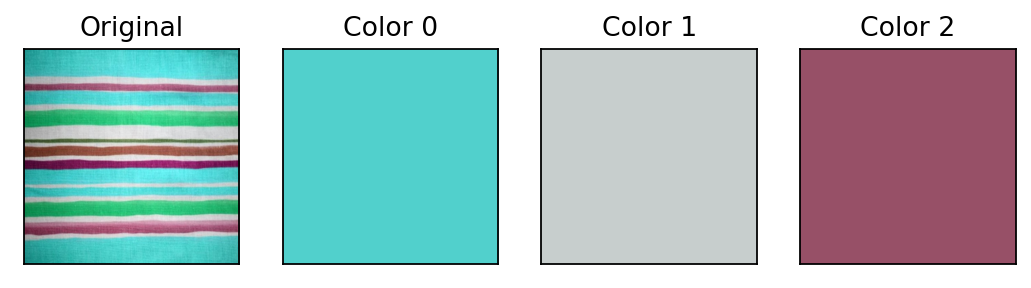

Count of Labels =  [(0, 1000)]


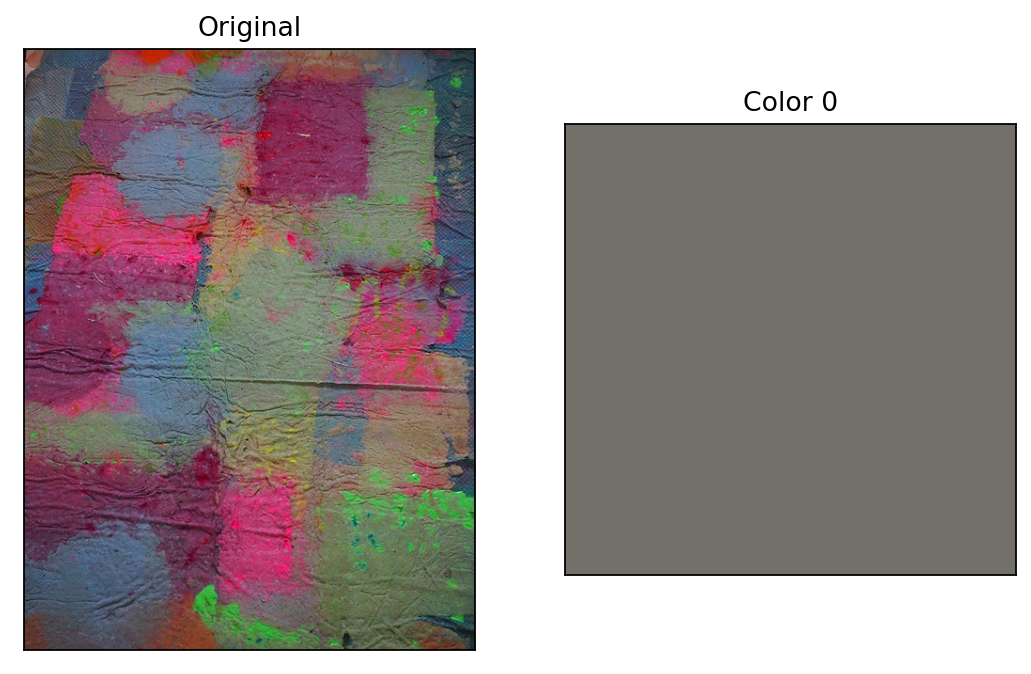

Count of Labels =  [(1, 355), (2, 265), (0, 253), (3, 127)]


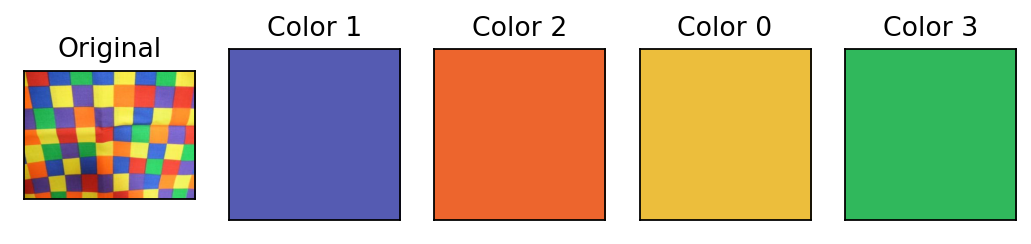

Count of Labels =  [(0, 815), (1, 125), (2, 38), (3, 22)]


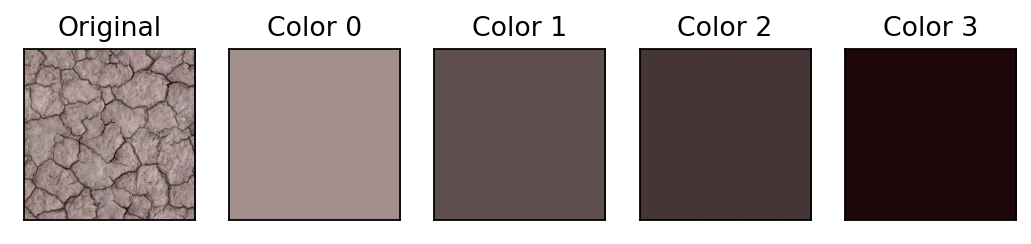

Count of Labels =  [(0, 1000)]


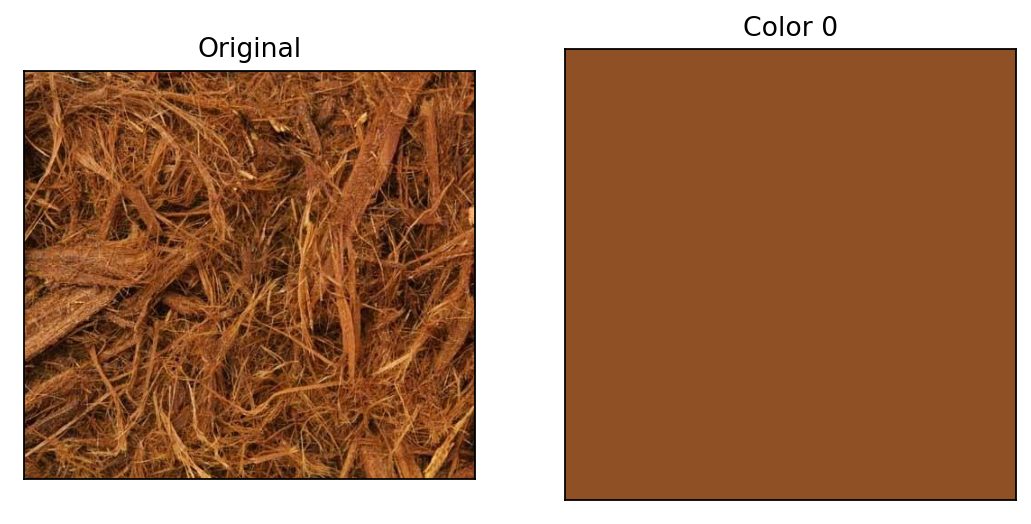

Count of Labels =  [(0, 817), (2, 123), (1, 60)]


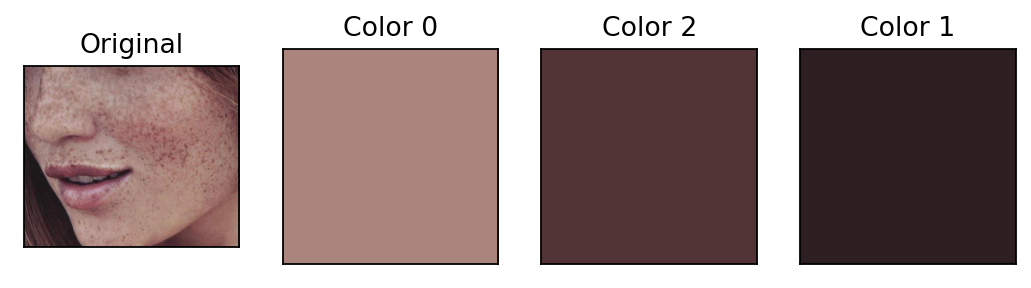

Count of Labels =  [(1, 372), (2, 332), (0, 296)]


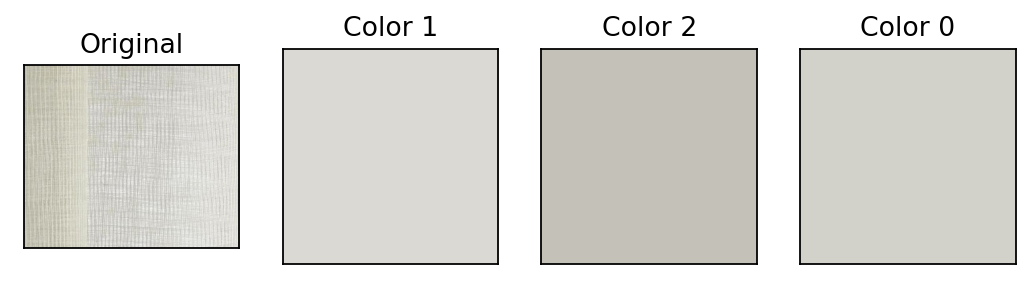

Count of Labels =  [(0, 773), (1, 148), (4, 37), (2, 26), (3, 16)]


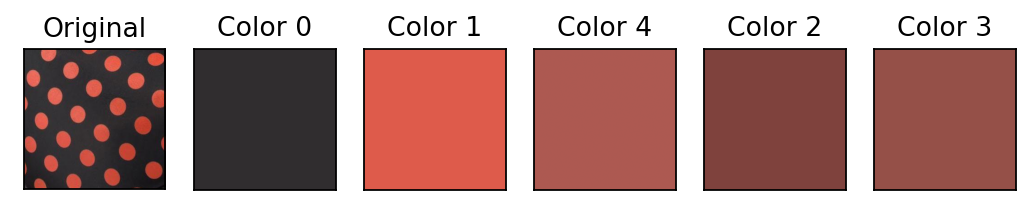

Count of Labels =  [(0, 671), (1, 201), (2, 87), (3, 41)]


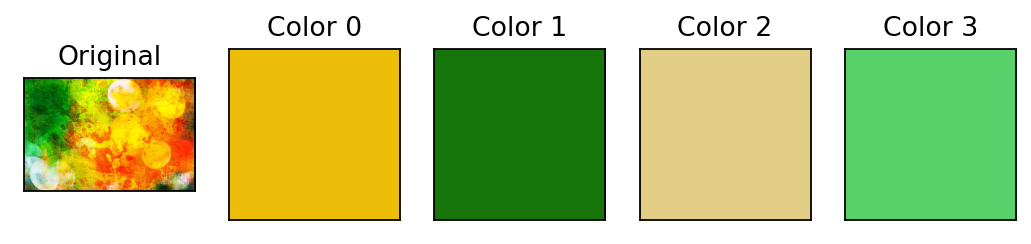

Count of Labels =  [(0, 504), (1, 271), (2, 225)]


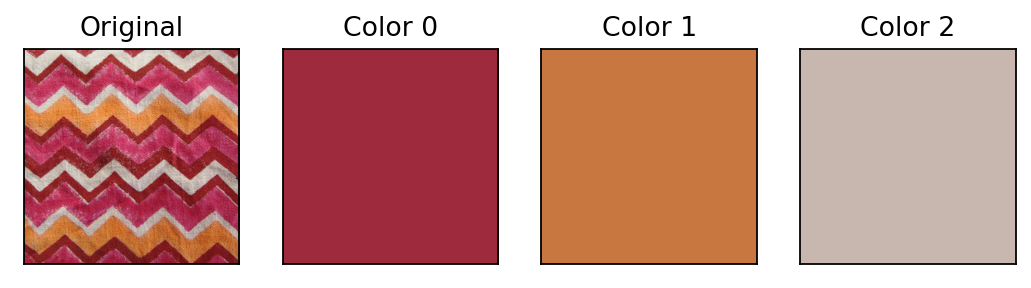

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
import os
from sklearn.cluster import MeanShift, estimate_bandwidth
import torch

folder = 'sample'
for filename in os.listdir(folder):
    figure(figsize=(8, 6), dpi=160)
    img_original = cv.imread(folder+'/'+filename)
    img_original = cv.cvtColor(img_original, cv.COLOR_BGR2RGB)
    pixels = np.reshape(img_original,(-1,3))
    pixels_sample = np.random.default_rng().choice(pixels,1000,replace=False)
    bandwidth = estimate_bandwidth(pixels_sample, quantile=0.2)
    clustering = MeanShift(bandwidth=bandwidth).fit(pixels_sample)
    labels_unique = np.unique(clustering.labels_)
    counter = Counter(clustering.labels_)
    print('Count of Labels = ',counter.most_common())
    plt.subplot(1,len(clustering.cluster_centers_)+1,1),plt.imshow(img_original)
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    for i in range(len(counter.most_common())):
        color_i = [[clustering.cluster_centers_[counter.most_common()[i][0]]/255]*400]*400
        plt.subplot(1,len(clustering.cluster_centers_)+1,i+2),plt.imshow(color_i)
        plt.title('Color '+str(counter.most_common()[i][0])), plt.xticks([]), plt.yticks([])
    plt.show()

# Mean Shift Clustering (HSV)

Count of Labels =  [(0, 568), (1, 236), (2, 139), (3, 57)]


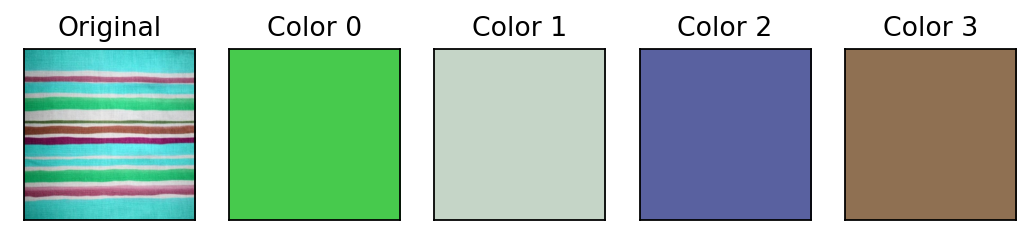

Count of Labels =  [(1, 526), (0, 455), (2, 19)]


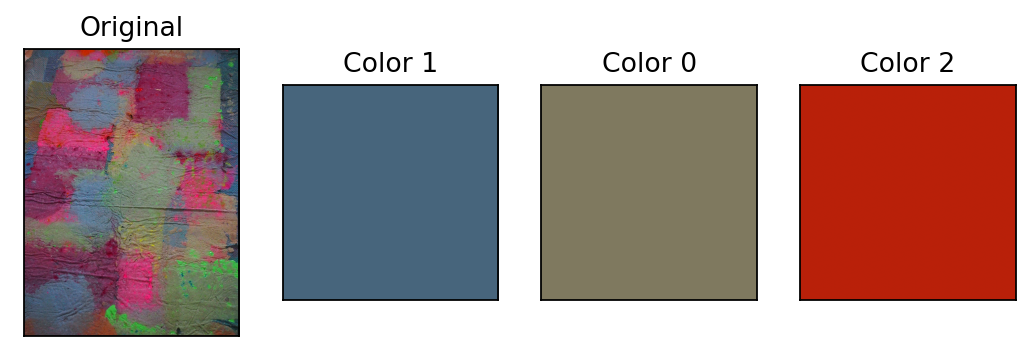

Count of Labels =  [(0, 571), (1, 391), (2, 38)]


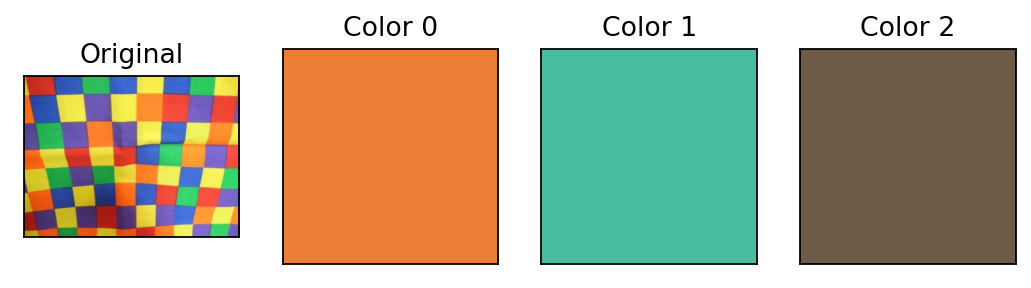

Count of Labels =  [(0, 790), (1, 161), (5, 21), (2, 13), (4, 6), (3, 5), (6, 2), (7, 2)]


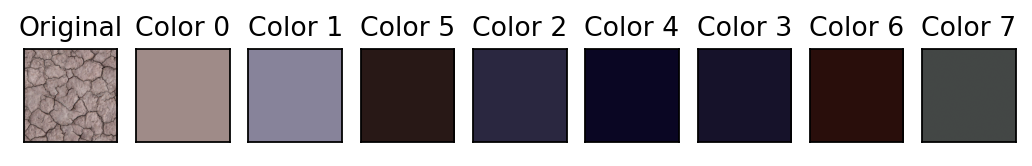

Count of Labels =  [(0, 993), (1, 7)]


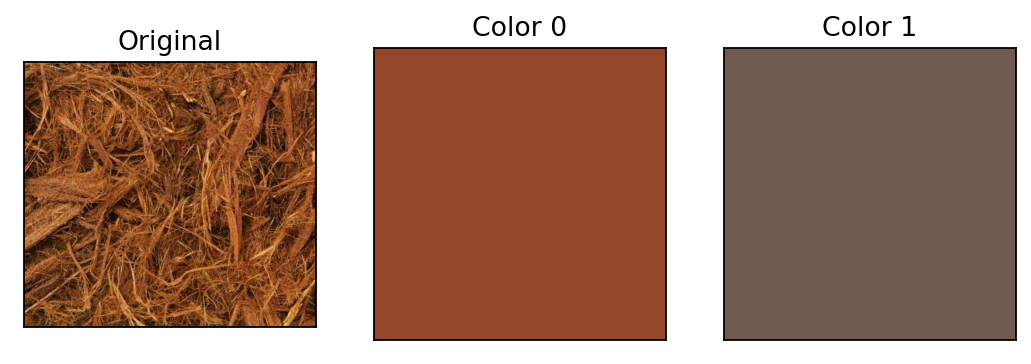

Count of Labels =  [(0, 797), (1, 203)]


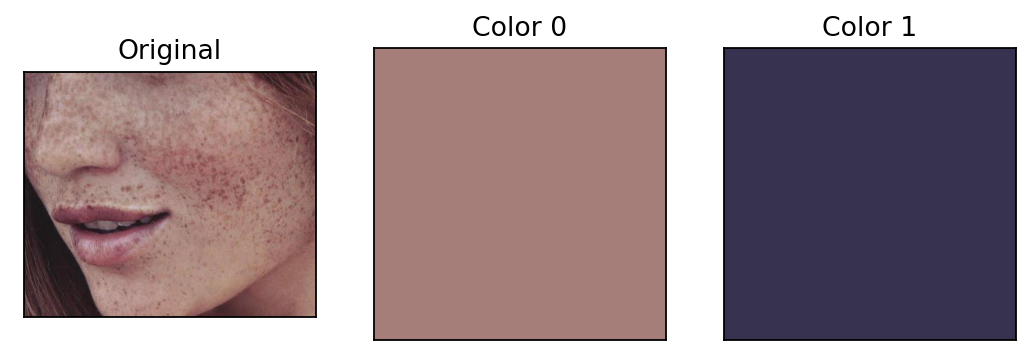

Count of Labels =  [(0, 541), (1, 459)]


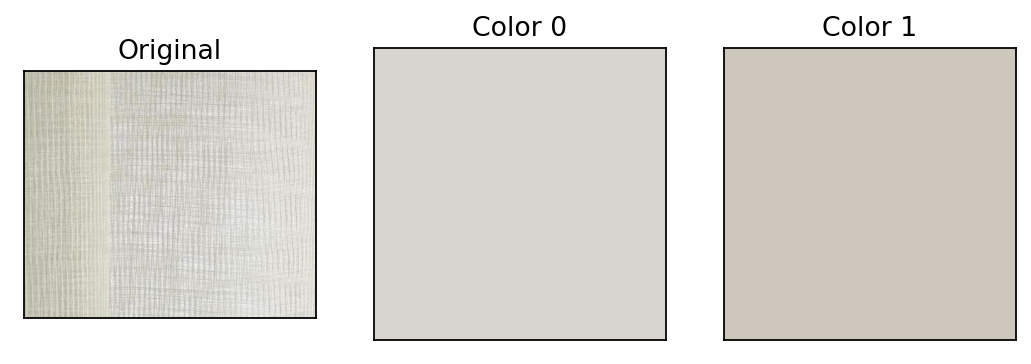

Count of Labels =  [(0, 603), (1, 233), (2, 62), (3, 38), (5, 34), (4, 27), (6, 3)]


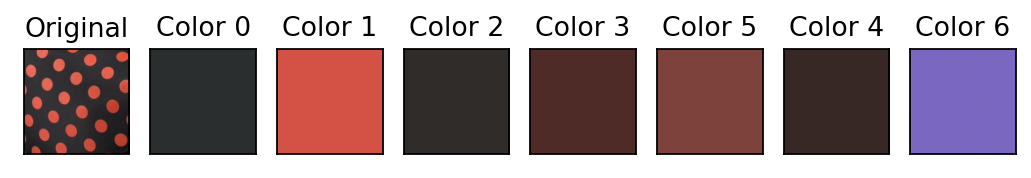

Count of Labels =  [(0, 602), (1, 296), (4, 37), (2, 24), (3, 16), (5, 16), (6, 6), (7, 2), (8, 1)]


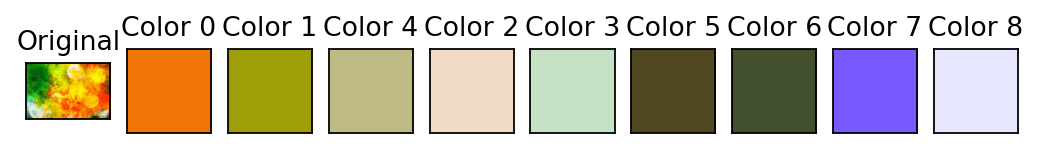

Count of Labels =  [(0, 511), (2, 273), (1, 216)]


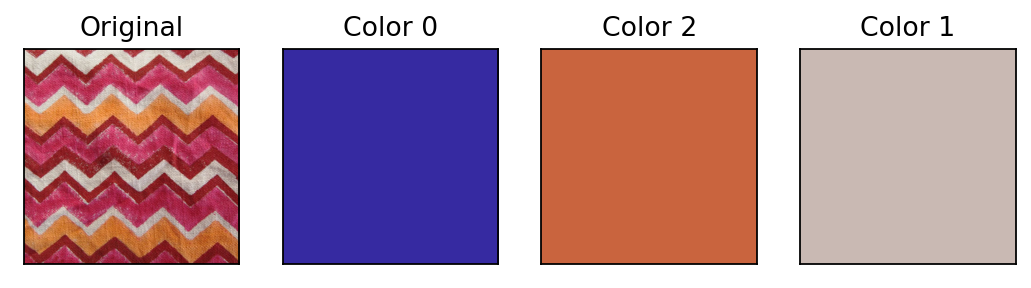

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from collections import Counter
import os
from sklearn.cluster import MeanShift, estimate_bandwidth
import torch
from matplotlib.colors import hsv_to_rgb

folder = 'sample'
for filename in os.listdir(folder):
    figure(figsize=(8, 6), dpi=160)
    img_original = cv.imread(folder+'/'+filename)
    img_hsv = cv.cvtColor(img_original, cv.COLOR_BGR2HSV)
    img_original = cv.cvtColor(img_original, cv.COLOR_BGR2RGB)
    pixels = np.reshape(img_hsv,(-1,3))
    pixels_sample = np.random.default_rng().choice(pixels,1000,replace=False)
    bandwidth = estimate_bandwidth(pixels_sample, quantile=0.2)
    clustering = MeanShift(bandwidth=bandwidth).fit(pixels_sample)
    labels_unique = np.unique(clustering.labels_)
    counter = Counter(clustering.labels_)
    print('Count of Labels = ',counter.most_common())
    plt.subplot(1,len(clustering.cluster_centers_)+1,1),plt.imshow(img_original)
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    for i in range(len(counter.most_common())):
        color_i = hsv_to_rgb(clustering.cluster_centers_[counter.most_common()[i][0]]/255)
        color_i = [[color_i]*400]*400
        plt.subplot(1,len(clustering.cluster_centers_)+1,i+2),plt.imshow(color_i)
        plt.title('Color '+str(counter.most_common()[i][0])), plt.xticks([]), plt.yticks([])
    plt.show()